<a href="https://colab.research.google.com/github/karumugamio/NLAProjEnglishtoSimpleEnglishMT/blob/master/Analysis_of_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]

In [0]:
def get_jaccard_sim(str1, str2): 
    a = set(str1.split()) 
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [0]:
from nltk.translate.bleu_score import *
import nltk
def get_bleu(str1,str2):
  weights = [0.25, 0.25, 0.25, 0.25]
  candidate = str1.split()
  ref = str2.split()
  simscr = nltk.translate.bleu_score.sentence_bleu([candidate], ref)
  return round(simscr,10)

In [6]:
import os
import pandas as pd
import numpy as np

os.chdir('/gdrive/My Drive/NLAProjectWS/Result files/QAnalysis')
os.listdir()

['Epoc_Size_10_Transformer_1000_Sentence_v2.pkl',
 'Epoc_Size_20_Transformer_1000_Sentence_v3.csv',
 'Epoc_Size_2_Transformer_3000_Sentence pd.pkl',
 'Epoc_Size_10_Transformer_1000_Sentence_v1.csv',
 'SMT 3000 Sentence pd.pkl',
 'Epoc_Size_10_Transformer_1000_Sentence_v1.pkl',
 'Epoc_Size_10_Transformer_1000_Sentence_v2.csv',
 'SMT 100 Sentence pd.csv',
 'SMT 100 Sentence pd.pkl',
 'Epoc_Size_2_Transformer_3000_Sentence pd.csv',
 'SMT 3000 Sentence pd.csv',
 'Epoc_Size_20_Transformer_1000_Sentence_v3.pkl',
 'Epoc_Size_20_Transformer_1000_Sentence_v2.csv',
 'Epoc_Size_20_Transformer_1000_Sentence_v2.pkl']

In [19]:
xfr_e10_df= pd.read_pickle('Epoc_Size_10_Transformer_1000_Sentence_v2.pkl')
xfr_e10_df.head()

xfr_e10_df['jaccard_tar_pre'] = xfr_e10_df.apply(lambda row: get_jaccard_sim(row['Target'], row['Predicted']), axis=1)
xfr_e10_df['jaccard_src_tar'] = xfr_e10_df.apply(lambda row: get_jaccard_sim(row['Target'], row['Source']), axis=1)

xfr_e10_df['bleu_tar_pre'] = xfr_e10_df.apply(lambda row:get_bleu(row['Target'], row['Predicted']), axis=1)

xfr_e10_df['src_word_Count'] = xfr_e10_df['Source'].str.split().str.len()
xfr_e10_df['target_word_Count'] = xfr_e10_df['Target'].str.split().str.len()
xfr_e10_df['predicted_word_Count'] = xfr_e10_df['Predicted'].str.split().str.len()


xfr_e10_df.head()

/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


,Source,Target,Predicted,jaccard_tar_pre,jaccard_src_tar,bleu_tar_pre,src_word_Count,target_word_Count,predicted_word_Count
0,The first European settlement of the Peninsula...,The first European settlement of the Peninsula...,the dail descendants settlement abolished the ...,0.136364,0.800000,0.385032,15,14,14
1,Jeffrey Brian Burton also sometimes referred t...,Jeffrey Brian Burton is a Nascar Sprint Cup se...,abi brian tesson well known iowa to darling ru...,0.000000,0.473684,0.000000,17,11,14
2,Noyelles l es Vermelles is a commune in the Pa...,Noyelles-l ès - Vermelles is a commune . It is...,alincthun sahib uf ere ginger commune . in peo...,0.230769,0.423077,0.240040,23,25,14
3,The following table shows the distribution of ...,The following table shows the distribution of ...,the following table shows the designated of te...,0.380952,0.888889,0.183367,18,17,14
4,The name Tardigrada means slow walker and was ...,The name Tardigrada means `` slow walker '' an...,the name gunnar wire sensitive natha and was g...,0.291667,0.823529,0.165039,14,17,14


In [20]:
xfr_e20_df= pd.read_pickle('Epoc_Size_20_Transformer_1000_Sentence_v3.pkl')

xfr_e20_df['jaccard_tar_pre'] = xfr_e20_df.apply(lambda row: get_jaccard_sim(row['Target'], row['Predicted']), axis=1)
xfr_e20_df['jaccard_src_tar'] = xfr_e20_df.apply(lambda row: get_jaccard_sim(row['Target'], row['Source']), axis=1)
xfr_e20_df['bleu_tar_pre'] = xfr_e20_df.apply(lambda row:get_bleu(row['Target'], row['Predicted']), axis=1)

xfr_e20_df['src_word_Count'] = xfr_e20_df['Source'].str.split().str.len()
xfr_e20_df['target_word_Count'] = xfr_e20_df['Target'].str.split().str.len()
xfr_e20_df['predicted_word_Count'] = xfr_e20_df['Predicted'].str.split().str.len()

xfr_e20_df.head()

/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


,Source,Target,Predicted,jaccard_tar_pre,jaccard_src_tar,bleu_tar_pre,src_word_Count,target_word_Count,predicted_word_Count
0,The Balochistan Forest Dormouse is a species o...,The Balochistan Forest Dormouse is a species o...,extinct piceno is a bear a small found in the ...,0.227273,1.000000,0.484152,14,14,14
1,According to legend young pilots on kamikaze m...,"According to legend , young pilots on kamikaze...",in embassies the dawkins morgenstierne gene on...,0.064516,0.708333,0.347182,19,22,14
2,Iraklis Thessaloniki F .C . or simply Iraklis ...,Iraklis is a Greek football club which is base...,sint bear is also abbreviated if orbits orbits...,0.125000,0.296296,0.549413,24,18,14
3,During the eighty years subsequent to the Brug...,It is the capital of the district of Brugg .,jand pakistan is the territories of the majori...,0.200000,0.133333,0.484152,35,10,14
4,During the melee that follows Musetta and Marc...,"As the group sings , Musetta and Marcello fall...",she told the religions that humans and eleven ...,0.125000,0.476190,0.633472,17,15,14


In [21]:
smt_df= pd.read_pickle('SMT 3000 Sentence pd.pkl')
smt_df.head()

#xfr_e10_df['jaccard_tar_pre'] = xfr_e10_df.apply(lambda row: get_jaccard_sim(row['Target'], row['Predicted']), axis=1)
#xfr_e10_df['jaccard_src_tar'] = xfr_e10_df.apply(lambda row: get_jaccard_sim(row['Target'], row['Source']), axis=1)
smt_df['bleu_tar_pre'] = smt_df.apply(lambda row:get_bleu(row['Target'], row['Predicted']), axis=1)


smt_df['src_word_Count'] = smt_df['Source'].str.split().str.len()
smt_df['target_word_Count'] = smt_df['Target'].str.split().str.len()
smt_df['predicted_word_Count'] = smt_df['Predicted'].str.split().str.len()


smt_df.head()

/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


,Source,Target,Predicted,jaccard_tar_pre,jaccard_src_tar,bleu_tar_pre,src_word_Count,target_word_Count,predicted_word_Count
0,Three hundred sixty-two Trojan athletes have p...,362 Trojan athletes have been in the Olympic g...,relieved hundred rebels 1184 athletes have ...,0.615385,0.750000,0.592437,23,21,23
1,"In 1997 , a sequel cartoon entitled Extreme Gh...","In 1997 , a sequel cartoon entitled Extreme Gh...","centennial 1997 , a sequel cartoon entitled...",0.407407,1.000000,0.375184,20,20,20
2,Zygotes are usually produced by a fertilizatio...,Zygotes are produced by fertilization between ...,rebels are usually produced by a fertilizat...,0.500000,0.580645,0.200923,35,23,35
3,"Yoghurt also has medical uses , in particular ...",Yoghurt also has medical uses . and in prevent...,"yogurt also has medical uses , in particula...",0.363636,0.578947,0.170011,21,12,21
4,The ` inner parlor ' was located off the clois...,The ` inner parlor ' was found off the cloiste...,7.5-9 ` inner parlor ' was located off the ...,0.708333,0.863636,0.689390,23,24,23


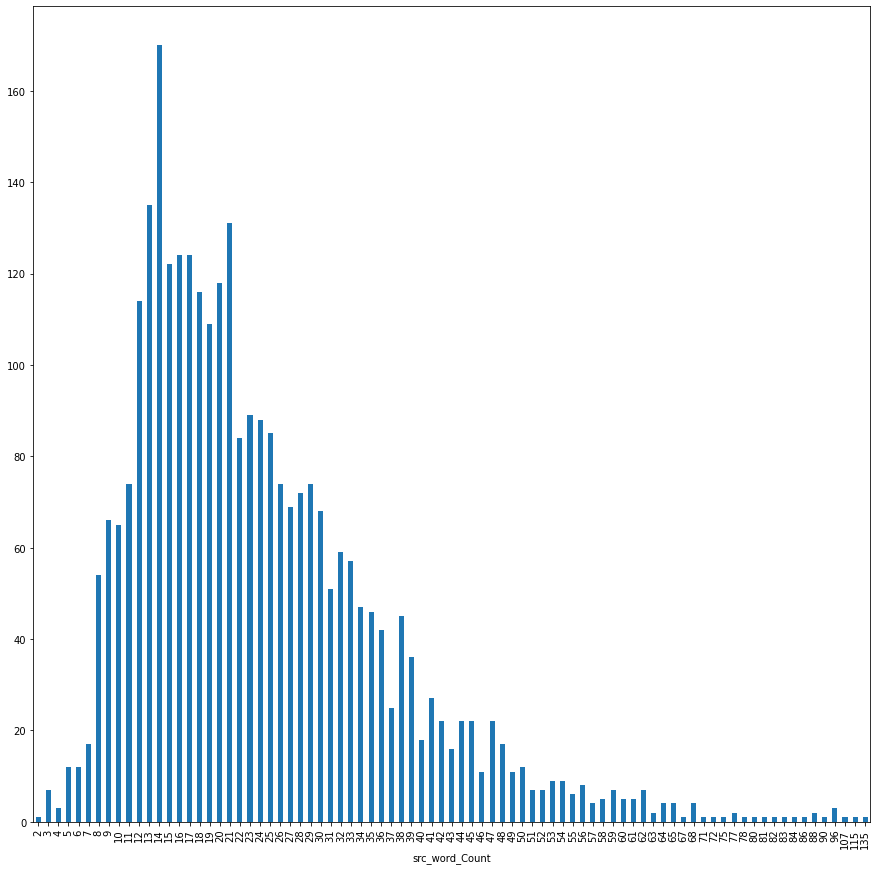

In [26]:
import matplotlib.pyplot as plt
plt.clf()
smt_df.groupby('src_word_Count').size().plot(kind='bar')
plt.show()

# Group by Data based on word length

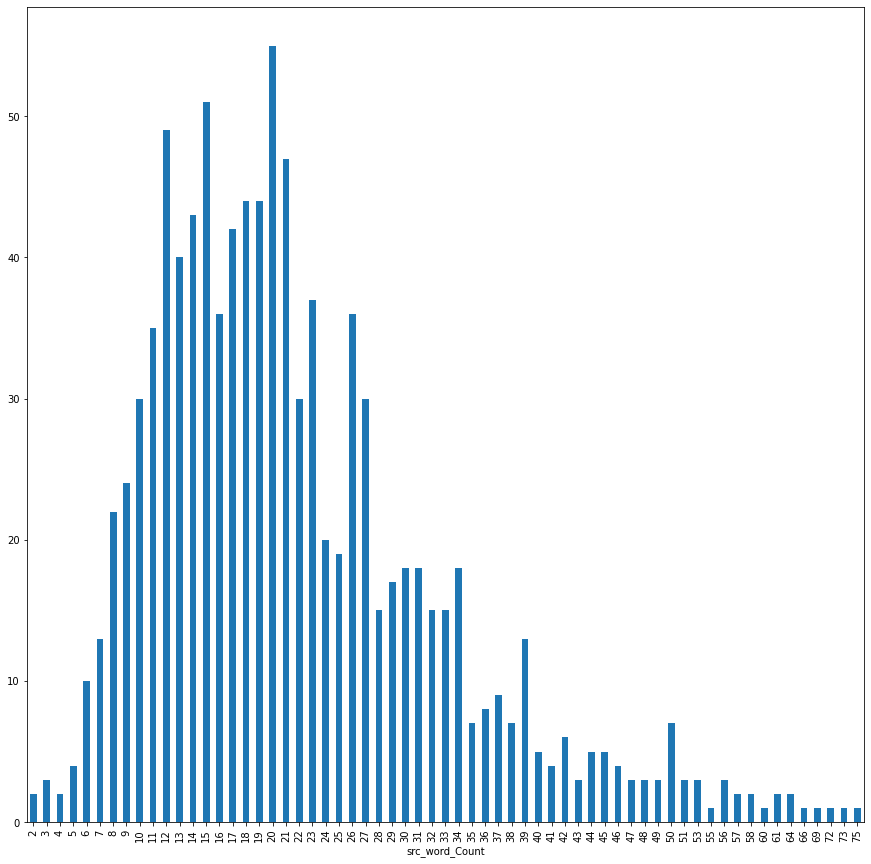

In [28]:
plt.clf()
xfr_e10_df.groupby('src_word_Count').size().plot(kind='bar')
plt.show()

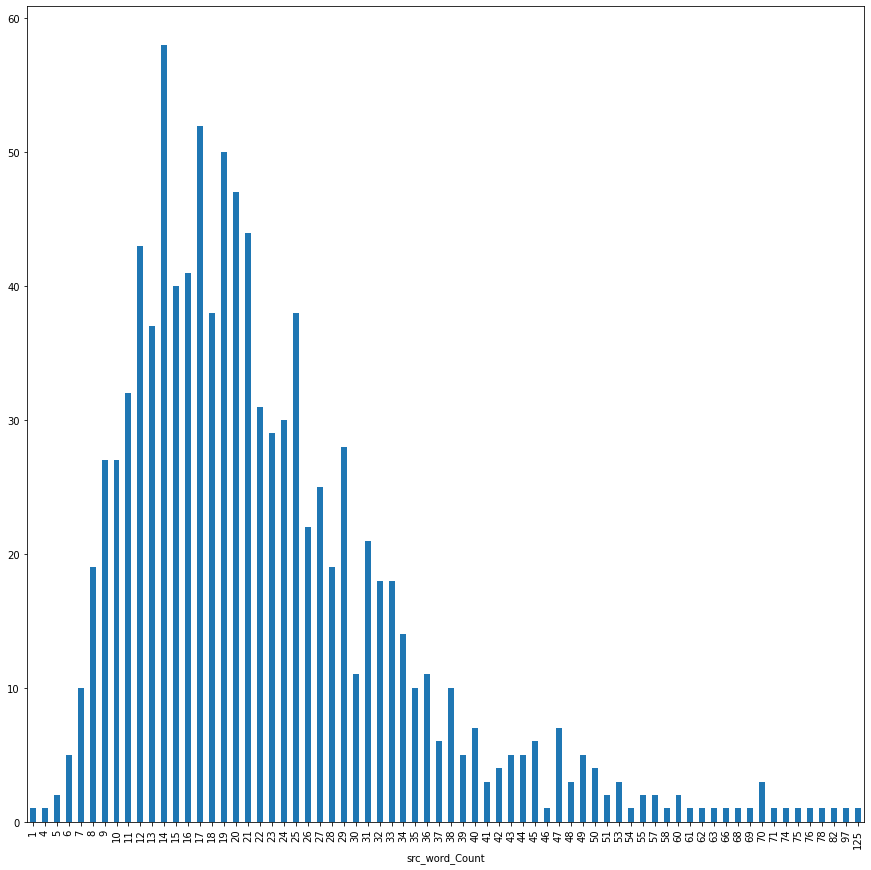

In [29]:
plt.clf()
xfr_e20_df.groupby('src_word_Count').size().plot(kind='bar')
plt.show()

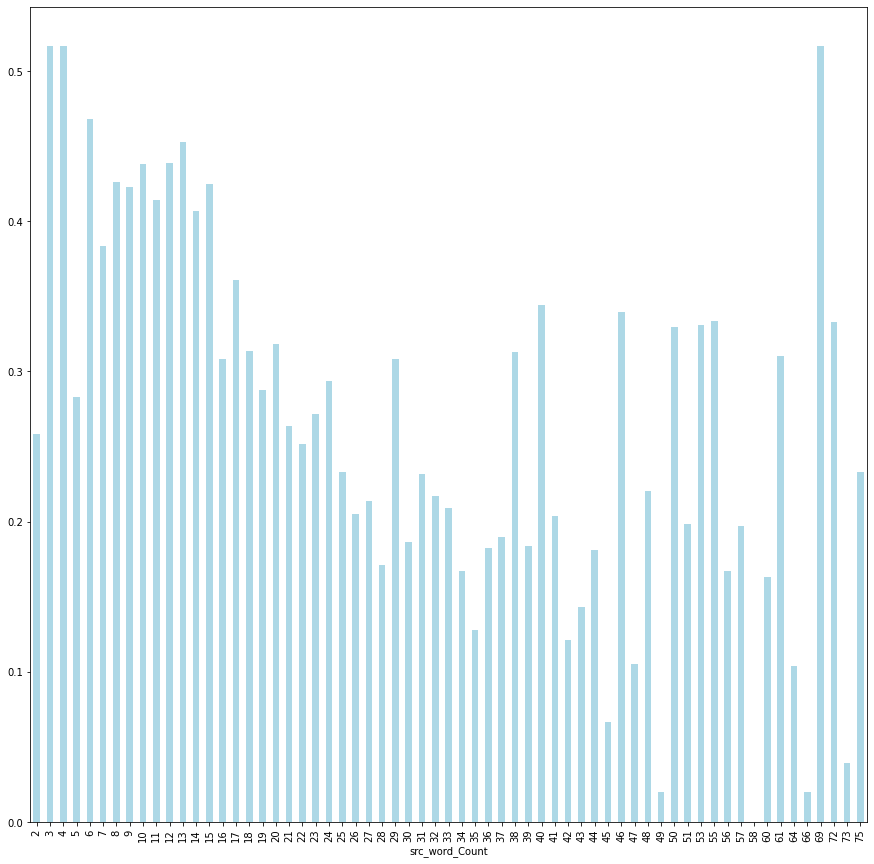

In [33]:
plt.clf()

ax = plt.gca()

# plot the means
xfr_e10_df.groupby('src_word_Count')['bleu_tar_pre'].mean().plot(kind='bar',color='lightblue',ax=ax)
plt.show()


# **Bleu Score Trend with Respect to number of Words in the Source Sentence**


1.   **Word Based SMT Model with 10 Epochs**



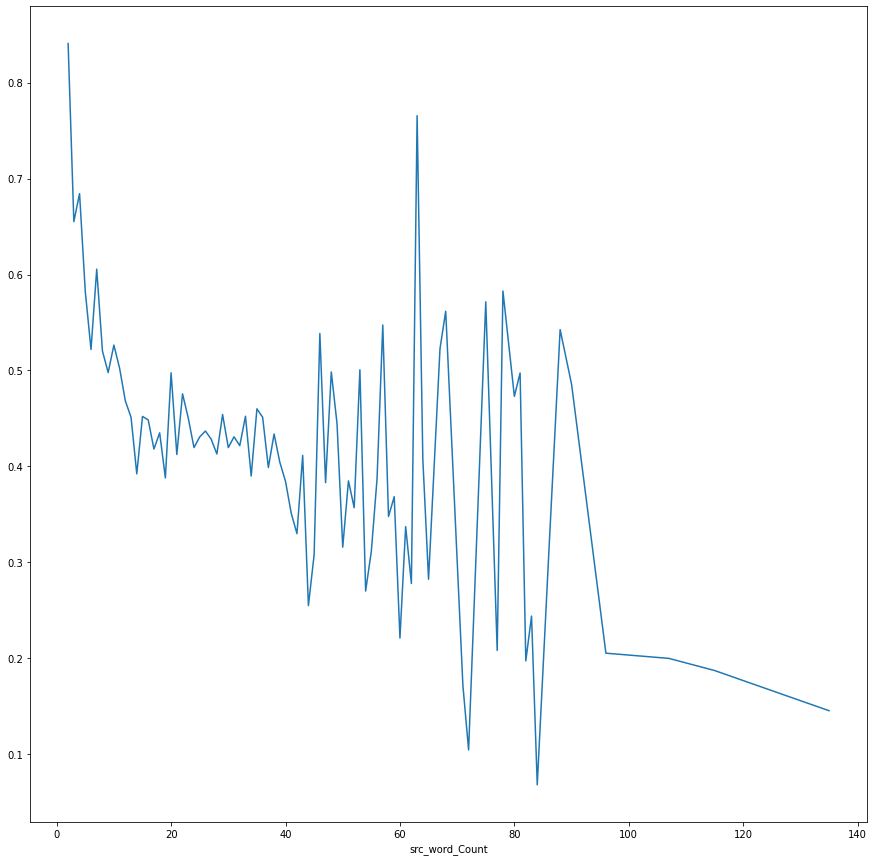

In [39]:
smt_df.groupby('src_word_Count').mean()['bleu_tar_pre'].plot()


2.   **Transformer Based Model with 10 Epochs**


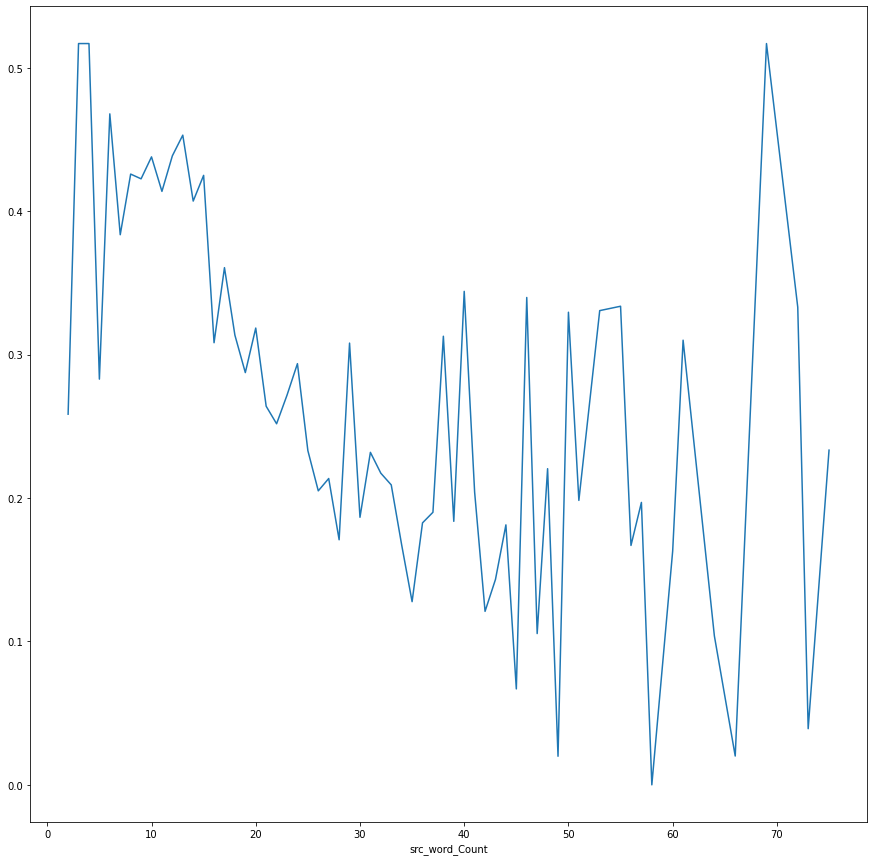

In [37]:
xfr_e10_df.groupby('src_word_Count').mean()['bleu_tar_pre'].plot()


3.   **Transformer Based Model with 20 Epochs**


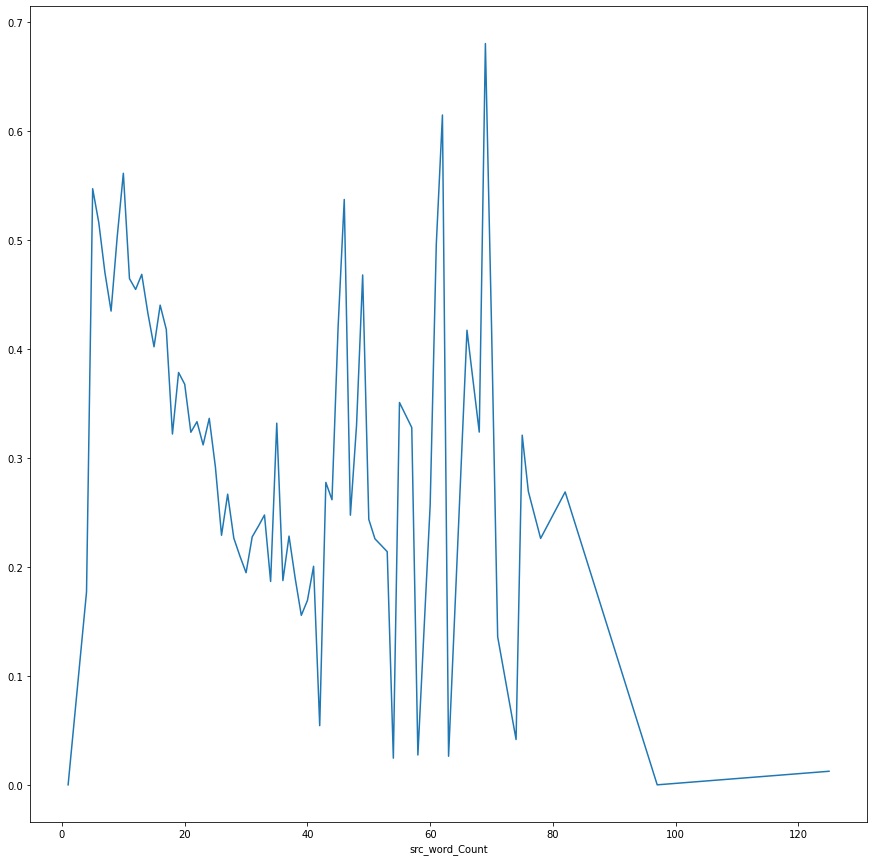

In [38]:
xfr_e20_df.groupby('src_word_Count').mean()['bleu_tar_pre'].plot()

## **Over All Score for the System**

In [40]:
BLEUscore = nltk.translate.bleu_score.corpus_bleu(smt_df['Target'].tolist(), smt_df['Predicted'].tolist(), weights = [1])
print(BLEUscore)

0.14991454421589837


In [41]:
BLEUscore = nltk.translate.bleu_score.corpus_bleu(xfr_e10_df['Target'].tolist(), xfr_e10_df['Predicted'].tolist(), weights = [1])
print(BLEUscore)

0.21486967633083978


In [42]:
BLEUscore = nltk.translate.bleu_score.corpus_bleu(xfr_e20_df['Target'].tolist(), xfr_e20_df['Predicted'].tolist(), weights = [1])
print(BLEUscore)

0.230318647122601


# Graph for Error Rate while Training
